<a href="https://colab.research.google.com/github/mariliafcborba/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas

In [1]:
# Análise de dados
import pandas as pd
import numpy as np 

In [2]:
!pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 62.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=dc8fbf3d7711a20ff501d9534338c9f8975491bbc16efacb8136a9eaf868a0f7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

In [3]:
# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from pandas_profiling import ProfileReport

<ipython-input-3-e74f978a4c07>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Carregamento e visualização dos dados

In [4]:
df = pd.read_csv('Titanic.csv')
df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


In [5]:
# Visualizando as 5 primeiras linhas do dataframe
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [6]:
# Total de linhas e colunas
df.shape

(891, 10)

In [7]:
df.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')

In [8]:
# Tipos dos dados
df.dtypes

sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
class        object
who          object
alone          bool
survived      int64
dtype: object

In [9]:
# Variáveis numéricas
df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [10]:
# Variáveis categóricas
df.describe(include=['O'])

,sex,embarked,class,who
count,891,889,891,891
unique,2,3,3,3
top,male,S,Third,man
freq,577,644,491,537


# Verificando se há valores nulos / dados ausentes

In [86]:
# Verificando se há valores nulos 
df.isnull().any()

sex         False
age         False
sibsp       False
parch       False
fare        False
embarked    False
class       False
who         False
alone       False
survived    False
dtype: bool

In [87]:
# Verificando a quantidade de valores nulos no dataset 
df.isnull().sum().sort_values(ascending=False)

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
dtype: int64

In [88]:
# Preenchendo os valores nulos da coluna 'age'
df['age'].fillna(df['age'].mean(), inplace=True)

In [89]:
# A coluna 'embarked' possui um número bem pequeno de valores faltantes,
# então podemos preenchê-la com a variável que mais se repete
df['embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: embarked, dtype: object

In [90]:
# Preenchendo os valores nulos da coluna 'embarked'
top = 'S'
df['embarked'] = df['embarked'].fillna(top)

df.isnull().sum().sort_values(ascending=False)

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
dtype: int64

# Análise exploratória

In [91]:
# Quantas pessoas sobreviveram e quantas morreram no Titanic?
survived = df[df['survived'] == 1]
not_survived = df[df['survived'] == 0]

print(f'Total de passageiros: {len(df)}')
print(f'Sobreviventes: {len(survived)}')
print(f'Não sobreviveram: {len(not_survived)}')

Total de passageiros: 891
Sobreviventes: 342
Não sobreviveram: 549


<Axes: xlabel='survived', ylabel='count'>

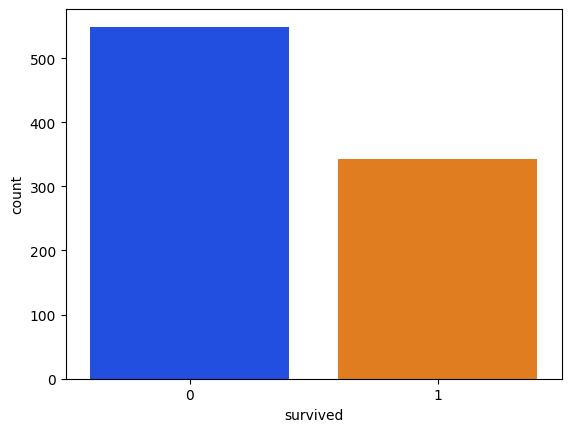

In [92]:
sns.countplot(data=df, x='survived', palette='bright')

In [93]:
# Total de passageiros por classe
df.groupby('class').size()

class
First     216
Second    184
Third     491
dtype: int64

<Axes: xlabel='class', ylabel='count'>

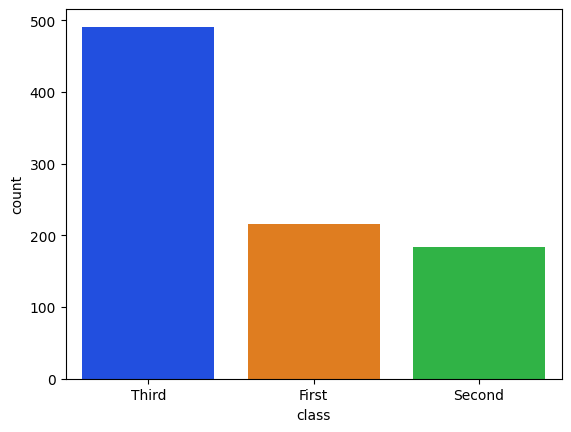

In [94]:
sns.countplot(data=df, x='class', palette='bright')

In [95]:
# Total de passageiros por sexo
# female = feminino, male = masculino
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

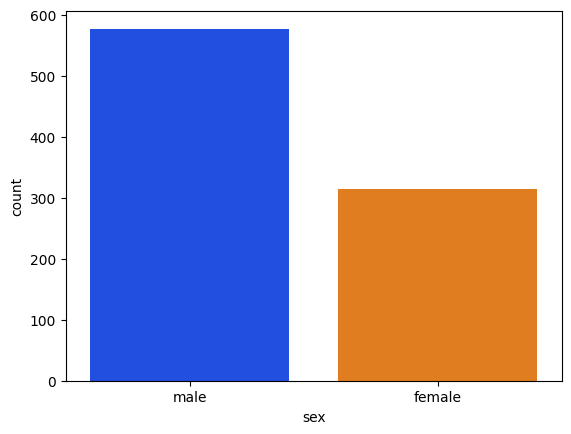

In [96]:
sns.countplot(data=df, x='sex', palette='bright')

In [97]:
# Número de passageiros de cada classe e seus respectivos sexos
pd.crosstab(df['class'],df['sex'])

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


<Axes: xlabel='class', ylabel='count'>

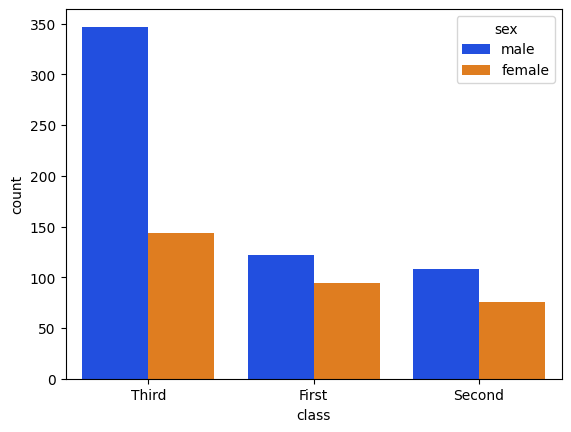

In [98]:
sns.countplot(data=df, x='class', hue='sex', palette='bright')

In [99]:
# Número de sobreviventes por classe
# 0 - not survived    1 - survived
pd.crosstab(df['class'],df['survived'])

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


<Axes: xlabel='survived', ylabel='count'>

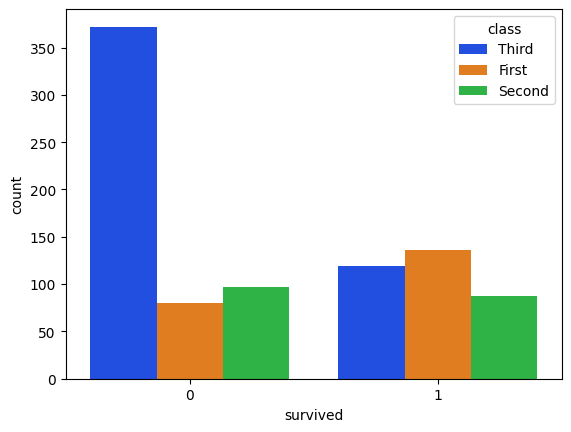

In [100]:
sns.countplot(data=df, x='survived', hue='class', palette='bright')

In [101]:
# Média de sobreviventes por classe
df[['class','survived']].groupby(['class'], as_index = False).mean().sort_values(by='survived',ascending=False)

,class,survived
0,First,0.629630
1,Second,0.472826
2,Third,0.242363


In [102]:
# Percentual de mortos e sobreviventes de cada classe
tt = df[['class', 'survived','sex']].groupby(by=['class','survived']).count().rename(columns={'sex':'Quantity'}).reset_index()
tt['Percentual'] = tt['Quantity'] / tt.groupby('class')['Quantity'].transform('sum')
tt['Percentual'] = tt['Percentual']*100
tt['Percentual'] = tt['Percentual'].apply(lambda x: str(int(round(x))) + "%")
tt

,class,survived,Quantity,Percentual
0,First,0,80,37%
1,First,1,136,63%
2,Second,0,97,53%
3,Second,1,87,47%
4,Third,0,372,76%
5,Third,1,119,24%


In [103]:
# Número de sobreviventes por sexo
# 0 - not survived    1 - survived
pd.crosstab(df['sex'],df['survived'])

survived,0,1
sex,,
female,81,233
male,468,109


<Axes: xlabel='survived', ylabel='count'>

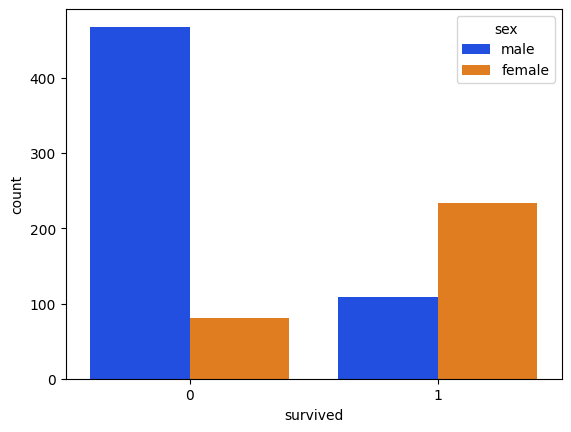

In [104]:
sns.countplot(data=df, x='survived', hue='sex', palette='bright')

In [105]:
# Média de sobreviventes por sexo
df[['sex', 'survived']].groupby(['sex'], as_index = False).mean()

,sex,survived
0,female,0.742038
1,male,0.188908


A sobrevivência de mulheres no Titanic é superior porque houve a implementação da política de "mulheres e crianças primeiro" durante o processo de evacuação dos passageiros do navio. Durante o naufrágio, houve uma prioridade dada às mulheres e crianças nos botes salva-vidas, o que contribuiu para uma taxa de sobrevivência mais alta entre as mulheres.

In [106]:
# Número de passageiros de acordo com a país de embarque
# S - Southampton (Reino Unido)
# C - Cherbourg-Octeville (França)
# Q - Queenstown (Irlanda)
df['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

O Titanic deixou o porto de Southampton às 12h15min do dia 10 de abril de 1912 e era um local de partida conveniente para as viagens transatlânticas, pois oferecia fácil acesso ao oceano Atlântico.

Além disso, muitos dos tripulantes do Titanic também eram de Southampton, isso explica o maior número de passageiros provenientes desse país.

In [107]:
# Número de sobreviventes por país de embarque
# 0 - not survived    1 - survived
pd.crosstab(df['embarked'],df['survived'])

survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,219


<Axes: xlabel='survived', ylabel='count'>

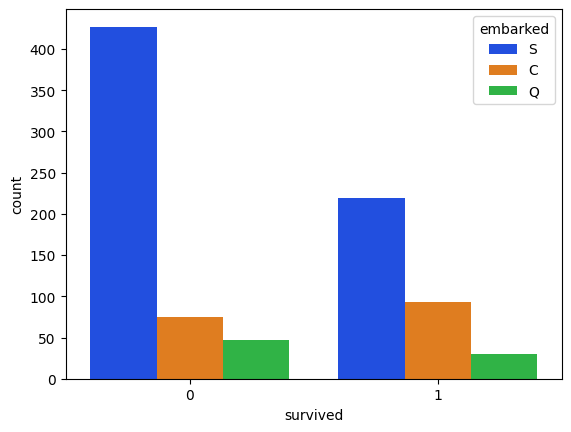

In [108]:
sns.countplot(data=df, x='survived', hue='embarked', palette='bright')

<Axes: xlabel='embarked', ylabel='survived'>

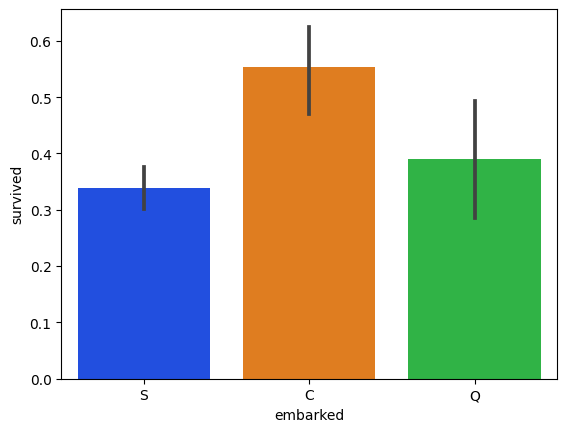

In [109]:
# Visualização de sobreviventes por país de embarque
sns.barplot(x='embarked', y='survived', data=df, palette='bright')

In [110]:
# Média de sobreviventes de acordo com o país de embarque
df[['embarked','survived']].groupby(['embarked'], as_index = False).mean().sort_values(by='survived',ascending=False)

,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [111]:
# Número de pais e filhos viajando com o passageiro
df['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [112]:
# Número de sobreviventes de acordo com a quantidade de pais e filhos viajando com o passageiro
# 0 - not survived    1 - survived
pd.crosstab(df['parch'],df['survived'])

survived,0,1
parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [113]:
# Média de sobrevivência com base no número de pais/ filhos que o passageiro tinha no navio
df[['parch','survived']].groupby(['parch'], as_index = False).mean().sort_values(by='survived',ascending=False)

,parch,survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<Axes: xlabel='parch', ylabel='survived'>

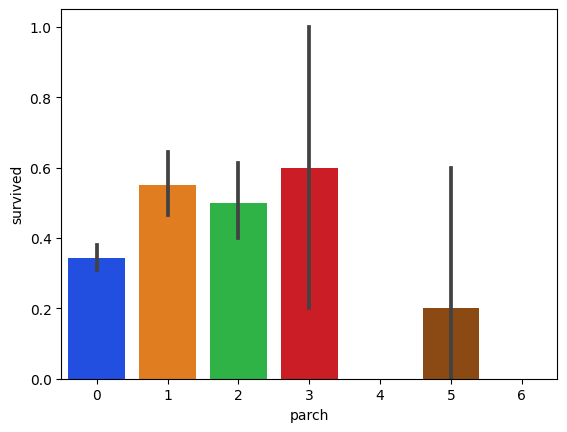

In [114]:
sns.barplot(x='parch', y='survived', data=df, palette='bright')

In [115]:
# Número de irmãos e cônjuges viajando com o passageiro
df['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [116]:
# Número de sobreviventes de acordo com a quantidade de irmãos e cônjuges viajando com o passageiro
# 0 - not survived    1 - survived
pd.crosstab(df['sibsp'],df['survived'])

survived,0,1
sibsp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [117]:
# Média de sobrevivência com base no número de irmãos e cônjuges que o passageiro tinha no navio
df[['sibsp','survived']].groupby(['sibsp'], as_index = False).mean().sort_values(by='survived',ascending=False)

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<Axes: xlabel='sibsp', ylabel='survived'>

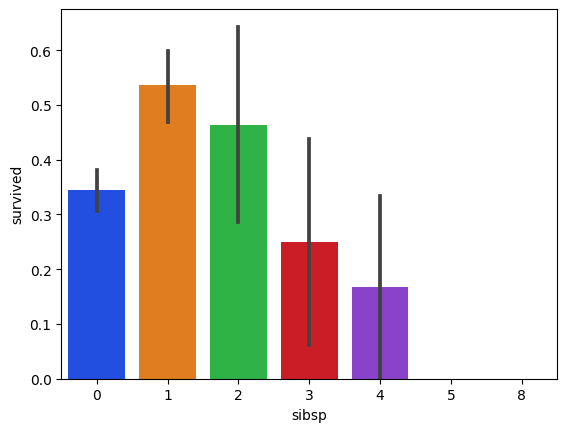

In [118]:
sns.barplot(x='sibsp', y='survived', data=df, palette='bright')

# Visualização de dados

In [119]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-120-716680e95479>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], kde=False, bins=30, color='b')


<Axes: xlabel='age'>

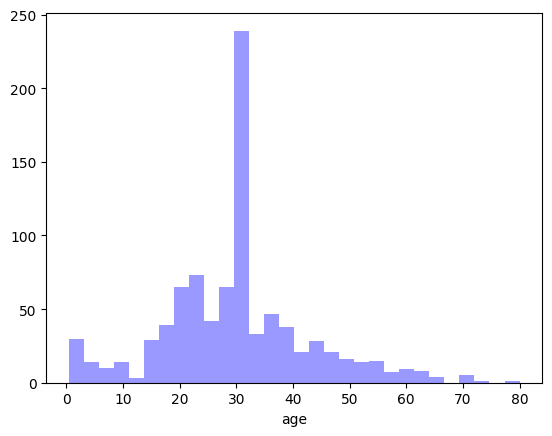

In [120]:
# Distribuição das idades
sns.distplot(df['age'], kde=False, bins=30, color='b')

<ipython-input-121-79ded3d5e3d7>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], shade=True, color='b')


<Axes: xlabel='age', ylabel='Density'>

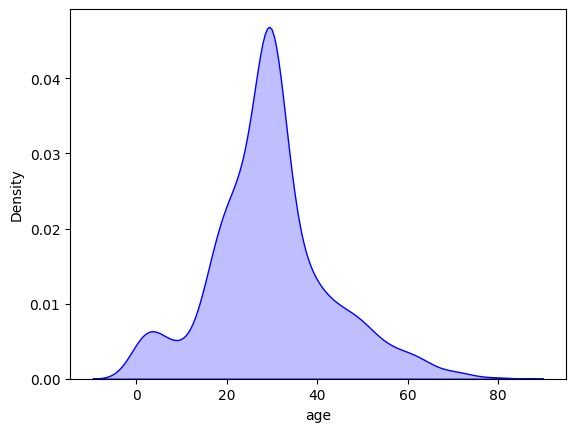

In [121]:
sns.kdeplot(df['age'], shade=True, color='b')

<Figure size 1500x600 with 0 Axes>

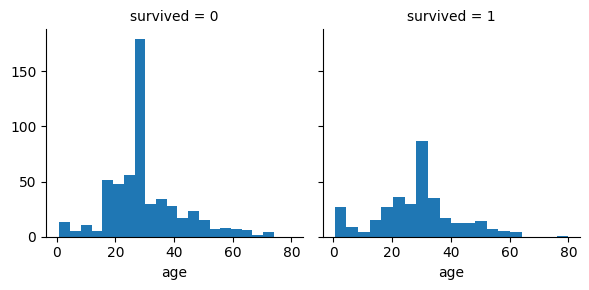

In [122]:
plt.figure(figsize = (15,6))
g = sns.FacetGrid(df, col = 'survived')
g.map(plt.hist, 'age', bins = 20)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-pack

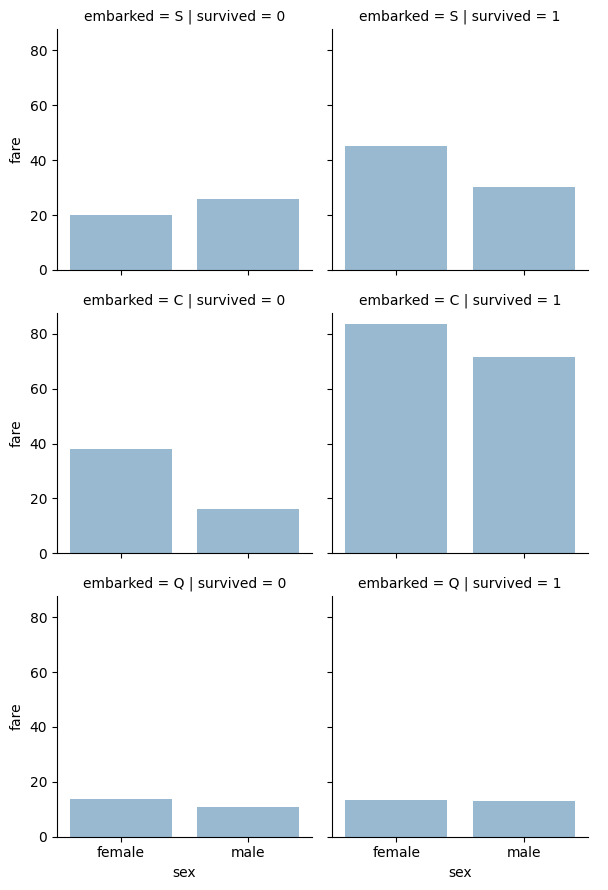

In [123]:
grid = sns.FacetGrid(df, row = 'embarked', col = 'survived')
grid.map(sns.barplot, 'sex', 'fare', alpha = 0.5, ci = None)
grid.add_legend()

<Axes: xlabel='survived', ylabel='count'>

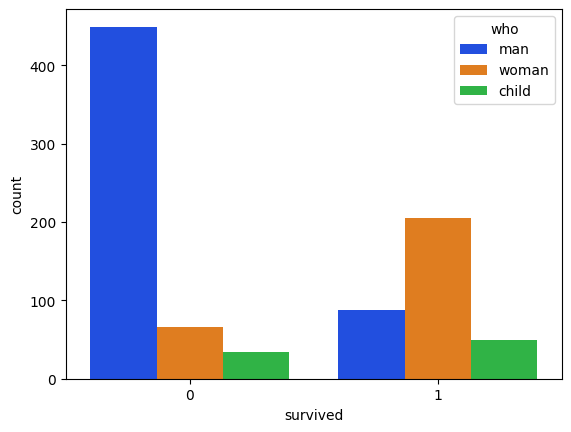

In [124]:
sns.countplot(data=df, x='survived', hue='who', palette='bright')

<Axes: xlabel='who', ylabel='count'>

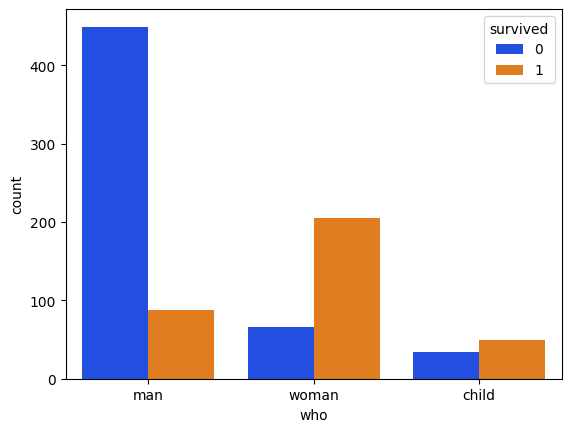

In [125]:
sns.countplot(data=df, x='who', hue='survived', palette='bright')

<Axes: xlabel='survived', ylabel='count'>

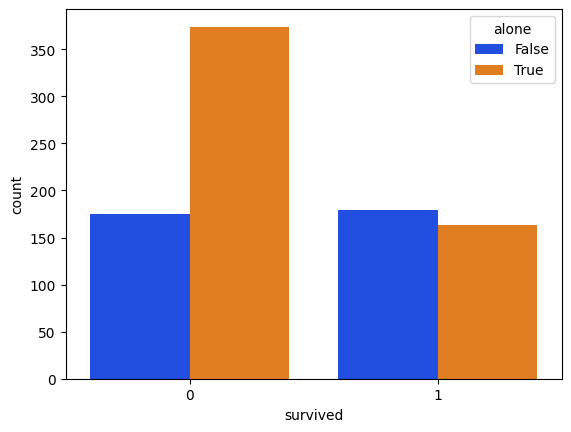

In [126]:
sns.countplot(data=df, x='survived', hue='alone', palette='bright')

<Axes: xlabel='alone', ylabel='count'>

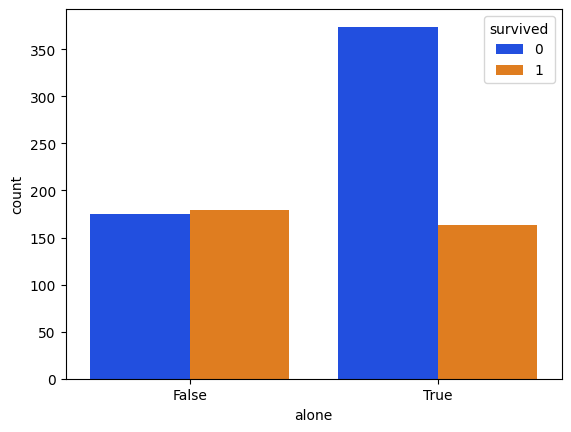

In [127]:
sns.countplot(data=df, x='alone', hue='survived', palette='bright')

<Axes: xlabel='alone', ylabel='count'>

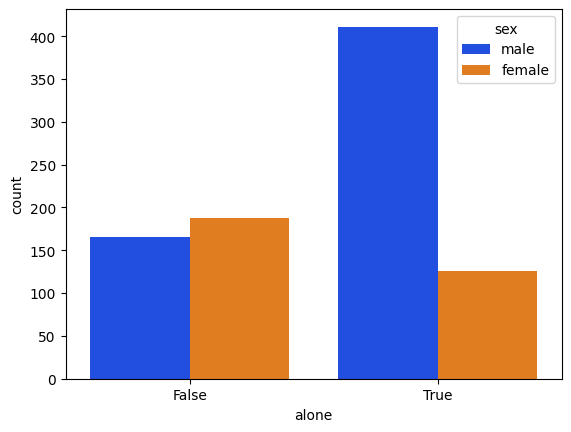

In [128]:
sns.countplot(data=df, x='alone', hue='sex', palette='bright')